In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\55839\AppData\Local\Temp\ipykernel_14240\1285016483.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
caminho = r"D:\##ANALISEDEDADOS\PROJETOS\PORTFOLIO\4. LEAD SCORING\Preditiva_Live 27_lead_scoring- Bases e PDF\Base_Leads.xlsx"
df = pd.read_excel(caminho)
df.head()

,Data do Lead,ID_Lead,Qual a sua área de atuação?,Qual o seu cargo atual?,Quais seus objetivos com o curso?,Como você conheceu a escola?,Conversão
0,2022-09-01,1511,Mercado Financeiro,Analista,Melhorar minha carreira e ganhar mais,Indicação,0
1,2022-09-03,1504,Comercial / Vendas,Estou desempregado(a) no momento,Melhorar minha carreira e ganhar mais,Indicação,0
2,2022-09-04,1659,Logística,Estou desempregado(a) no momento,Melhorar minha carreira e ganhar mais,Indicação,0
3,2022-09-07,1592,Mercado Financeiro,Estudante,Melhorar minha carreira e ganhar mais,Indicação,1
4,2022-09-08,2124,Comercial / Vendas,Analista,Melhorar minha carreira e ganhar mais,Indicação,0


In [3]:
df.shape

(461, 7)

In [4]:
#Conversão da base é 13.66%
df["Conversão"].value_counts(1)

Conversão
0    0.863341
1    0.136659
Name: proportion, dtype: float64

# Preparação de Dados + Análise Exploratória

#### Excluindo variáveis "Data do Lead" e "ID_Lead" pois não têm relação com o modelo

In [5]:
df2 = df.iloc[:, 2:]

#### Identificação de valores nulos

In [6]:
df2.isna().sum()

Qual a sua área de atuação?          0
Qual o seu cargo atual?              0
Quais seus objetivos com o curso?    0
Como você conheceu a escola?         0
Conversão                            0
dtype: int64

#### Identificação de valores duplicados

In [7]:
#os dados não são realmente duplicados
df2.duplicated().sum()

354

#### Identificação dos tipos de dados

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Qual a sua área de atuação?        461 non-null    object
 1   Qual o seu cargo atual?            461 non-null    object
 2   Quais seus objetivos com o curso?  461 non-null    object
 3   Como você conheceu a escola?       461 non-null    object
 4   Conversão                          461 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 18.1+ KB


#### Análise Univariada - Tabelas & Gráficos

In [9]:
#Medidas resumo da única variável quantitativa (conversão)
df2.describe().iloc[:,-1]

count    461.000000
mean       0.136659
std        0.343861
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Conversão, dtype: float64

In [10]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [11]:
import sweetviz as sv

C:\Users\55839\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
report = sv.analyze(df2)

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:01 -> (00:00 left)


In [13]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Análise Bivariada - Information Value (IV)

In [14]:
import scorecardpy as sc

In [15]:
sc.iv(df2, "Conversão")

,variable,info_value
1,Qual a sua área de atuação?,0.804043
3,Como você conheceu a escola?,0.538479
0,Qual o seu cargo atual?,0.386129
2,Quais seus objetivos com o curso?,0.176102


#### Criação de dummies para execução da regressão logística

In [16]:
df2 = pd.get_dummies(df)

In [17]:
df2.head()

,Data do Lead,ID_Lead,Conversão,Qual a sua área de atuação?_Comercial / Vendas,Qual a sua área de atuação?_Logística,Qual a sua área de atuação?_Mercado Financeiro,Qual a sua área de atuação?_Pessoas / Recursos Humanos,Qual o seu cargo atual?_Analista,Qual o seu cargo atual?_Coordenador(a) / Gerente,Qual o seu cargo atual?_Estou desempregado(a) no momento,Qual o seu cargo atual?_Estudante,Quais seus objetivos com o curso?_Apenas ver se agrega algo ao currículo,Quais seus objetivos com o curso?_Melhorar minha carreira e ganhar mais,Como você conheceu a escola?_Conta Salário,Como você conheceu a escola?_Facebook,Como você conheceu a escola?_Google,Como você conheceu a escola?_Indicação,Como você conheceu a escola?_Instagram,Como você conheceu a escola?_Youtube
0,2022-09-01,1511,0,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False
1,2022-09-03,1504,0,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False
2,2022-09-04,1659,0,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False
3,2022-09-07,1592,1,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False
4,2022-09-08,2124,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


# Criação de Target & Features

In [18]:
X = df2.drop(columns = [
    "Conversão", 
    "Data do Lead", 
    "ID_Lead", 
    "Qual a sua área de atuação?_Pessoas / Recursos Humanos",
    "Qual o seu cargo atual?_Estudante",
    "Quais seus objetivos com o curso?_Melhorar minha carreira e ganhar mais",
    "Como você conheceu a escola?_Youtube"
])
X = X.astype(int)
y = df2["Conversão"]

In [19]:
X

,Qual a sua área de atuação?_Comercial / Vendas,Qual a sua área de atuação?_Logística,Qual a sua área de atuação?_Mercado Financeiro,Qual o seu cargo atual?_Analista,Qual o seu cargo atual?_Coordenador(a) / Gerente,Qual o seu cargo atual?_Estou desempregado(a) no momento,Quais seus objetivos com o curso?_Apenas ver se agrega algo ao currículo,Como você conheceu a escola?_Conta Salário,Como você conheceu a escola?_Facebook,Como você conheceu a escola?_Google,Como você conheceu a escola?_Indicação,Como você conheceu a escola?_Instagram
0,0,0,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
456,0,1,0,0,1,0,1,0,0,0,0,1
457,0,1,0,0,0,1,1,0,0,0,0,1
458,0,1,0,1,0,0,0,0,0,0,0,1
459,0,0,1,1,0,0,0,0,0,0,0,1


# Treinamento do modelo

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, Y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 42    
)

In [23]:
X_train.head()

,Qual a sua área de atuação?_Comercial / Vendas,Qual a sua área de atuação?_Logística,Qual a sua área de atuação?_Mercado Financeiro,Qual o seu cargo atual?_Analista,Qual o seu cargo atual?_Coordenador(a) / Gerente,Qual o seu cargo atual?_Estou desempregado(a) no momento,Quais seus objetivos com o curso?_Apenas ver se agrega algo ao currículo,Como você conheceu a escola?_Conta Salário,Como você conheceu a escola?_Facebook,Como você conheceu a escola?_Google,Como você conheceu a escola?_Indicação,Como você conheceu a escola?_Instagram
7,0,0,1,0,0,1,0,0,0,0,1,0
420,1,0,0,1,0,0,1,0,0,0,0,1
108,1,0,0,1,0,0,0,0,0,0,1,0
238,1,0,0,0,0,0,0,0,0,0,0,1
431,1,0,0,0,0,0,0,0,1,0,0,0


In [24]:
X_test.head()

,Qual a sua área de atuação?_Comercial / Vendas,Qual a sua área de atuação?_Logística,Qual a sua área de atuação?_Mercado Financeiro,Qual o seu cargo atual?_Analista,Qual o seu cargo atual?_Coordenador(a) / Gerente,Qual o seu cargo atual?_Estou desempregado(a) no momento,Quais seus objetivos com o curso?_Apenas ver se agrega algo ao currículo,Como você conheceu a escola?_Conta Salário,Como você conheceu a escola?_Facebook,Como você conheceu a escola?_Google,Como você conheceu a escola?_Indicação,Como você conheceu a escola?_Instagram
225,1,0,0,1,0,0,0,0,0,0,0,1
30,0,0,1,0,0,1,0,0,0,0,1,0
39,0,0,1,0,0,1,0,0,0,0,1,0
222,1,0,0,1,0,0,1,0,0,0,1,0
124,0,1,0,1,0,0,1,0,1,0,0,0


# MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)

In [28]:
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [30]:
X_test_scaled

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

# Modelo

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
modelo = LogisticRegression(
    random_state = 0,
    fit_intercept = True
).fit(X_train_scaled, y_train)

# Mensuração

In [33]:
probabilidade = modelo.predict_proba(X_test_scaled)[:,1]
probabilidade

array([0.13057486, 0.52933674, 0.52933674, 0.13649834, 0.01793802,
       0.0487009 , 0.02976776, 0.0948809 , 0.07358802, 0.06584974,
       0.06584974, 0.1825646 , 0.0487009 , 0.02673368, 0.02976776,
       0.02976776, 0.14622554, 0.0487009 , 0.13057486, 0.31046244,
       0.20256127, 0.14971708, 0.14622554, 0.1825646 , 0.05112862,
       0.15608487, 0.2029783 , 0.01309167, 0.11081558, 0.31046244,
       0.07118224, 0.04027622, 0.27280342, 0.04027622, 0.0487009 ,
       0.13057486, 0.06584974, 0.09252902, 0.1039176 , 0.23739819,
       0.07457221, 0.13057486, 0.04027622, 0.13057486, 0.22506077,
       0.27280342, 0.20981168, 0.22506077, 0.02957647, 0.02957647,
       0.02957647, 0.06937277, 0.06584974, 0.02957647, 0.08266675,
       0.02748555, 0.08266675, 0.31046244, 0.22506077, 0.05091815,
       0.14622554, 0.0487009 , 0.52933674, 0.02040492, 0.31046244,
       0.2029783 , 0.05112862, 0.31046244, 0.08416019, 0.06584974,
       0.1122201 , 0.14741307, 0.03366735, 0.08207306, 0.08299

In [34]:
corte = 0.21
y_predito = np.where(probabilidade > corte, 1, 0)

In [35]:
X_test["ProbY=1"] = probabilidade

In [36]:
X_test = pd.merge(
    X_test,
    df["Conversão"],
    left_index = True,
    right_index = True,
    how="inner"
)

In [37]:
X_test.sort_values(by="ProbY=1", ascending=False).head(50)

,Qual a sua área de atuação?_Comercial / Vendas,Qual a sua área de atuação?_Logística,Qual a sua área de atuação?_Mercado Financeiro,Qual o seu cargo atual?_Analista,Qual o seu cargo atual?_Coordenador(a) / Gerente,Qual o seu cargo atual?_Estou desempregado(a) no momento,Quais seus objetivos com o curso?_Apenas ver se agrega algo ao currículo,Como você conheceu a escola?_Conta Salário,Como você conheceu a escola?_Facebook,Como você conheceu a escola?_Google,Como você conheceu a escola?_Indicação,Como você conheceu a escola?_Instagram,ProbY=1,Conversão
26,0,0,1,0,0,1,0,0,0,0,1,0,0.529337,1
30,0,0,1,0,0,1,0,0,0,0,1,0,0.529337,1
39,0,0,1,0,0,1,0,0,0,0,1,0,0.529337,0
11,0,0,1,0,0,1,0,0,0,0,1,0,0.529337,1
17,0,0,1,0,0,1,0,0,0,0,1,0,0.529337,0
42,0,0,1,0,0,1,0,0,0,0,1,0,0.529337,0
45,1,0,0,0,0,1,0,0,0,0,1,0,0.398763,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0.339261,1
5,0,0,1,0,0,0,0,0,0,0,1,0,0.339261,0
46,0,0,1,1,0,0,0,0,0,0,1,0,0.310462,0


# Avaliação do modelo

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

### Matriz de confusão

In [39]:
cm = confusion_matrix(X_test["Conversão"], y_predito)

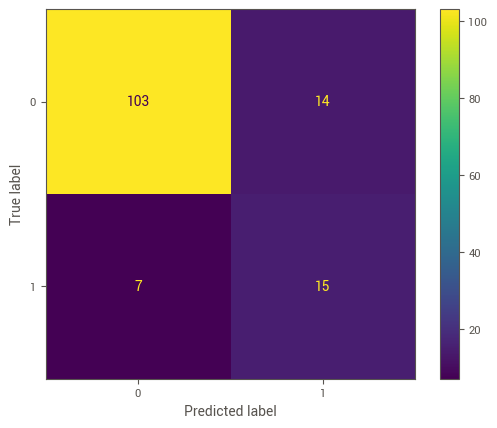

In [40]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### Precision, Recall, F1-Score

In [41]:
print(classification_report(X_test["Conversão"], y_predito))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       117
           1       0.52      0.68      0.59        22

    accuracy                           0.85       139
   macro avg       0.73      0.78      0.75       139
weighted avg       0.87      0.85      0.86       139



### ROC Score

In [42]:
roc_auc_score(X_test["Conversão"], X_test["ProbY=1"])

0.7894327894327894

# kFold

In [46]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

k = 5 # número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

lista_acuracia_train = []
lista_acuracia_test = []
lista_auc_train = []
lista_auc_test = []

for train_index, test_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    modelo_cv = LogisticRegression(
        random_state=0,
        fit_intercept=True
    ).fit(X_train_fold, y_train_fold)

    y_pred_train_fold = modelo_cv.predict(X_train_fold)
    y_pred_test_fold = modelo_cv.predict(X_val_fold)
    
    y_proba_train_fold = modelo_cv.predict_proba(X_train_fold)[:, 1]  # Probabilidade da classe positiva
    y_proba_test_fold = modelo_cv.predict_proba(X_val_fold)[:, 1]  # Probabilidade da classe positiva

    acuracia_train = accuracy_score(y_train_fold, y_pred_train_fold)
    lista_acuracia_train.append(acuracia_train)
    
    acuracia_test = accuracy_score(y_val_fold, y_pred_test_fold)
    lista_acuracia_test.append(acuracia_test)

    roc_auc_train = roc_auc_score(y_train_fold, y_proba_train_fold)
    lista_auc_train.append(roc_auc_train)

    roc_auc_test = roc_auc_score(y_val_fold, y_proba_test_fold)
    lista_auc_test.append(roc_auc_test)

media_acuracia_train = sum(lista_acuracia_train) / len(lista_acuracia_train)
media_acuracia_test = sum(lista_acuracia_test) / len(lista_acuracia_test)
media_auc_train = sum(lista_auc_train) / len(lista_auc_train)
media_auc_test = sum(lista_auc_test) / len(lista_auc_test)

# Calculando a média geral
media_acuracia_geral = (media_acuracia_train + media_acuracia_test) / 2
media_auc_geral = (media_auc_train + media_auc_test) / 2

print("Acurácia média geral:", media_acuracia_geral)
print("Acurácia média (treino):", media_acuracia_train)
print("Acurácia média (teste):", media_acuracia_test)
print("-------")
print("ROC AUC médio geral:", media_auc_geral)
print("ROC AUC médio (treino):", media_auc_train)
print("ROC AUC médio (teste):", media_auc_test)



Acurácia média geral: 0.8769639429602611
Acurácia média (treino): 0.8781105782282147
Acurácia média (teste): 0.8758173076923077
-------
ROC AUC médio geral: 0.753431605585561
ROC AUC médio (treino): 0.7862944487240616
ROC AUC médio (teste): 0.7205687624470604


# Aplicação do modelo na base inteira

In [47]:
modelo.fit(X, y)

LogisticRegression(random_state=0)

In [48]:
probY = modelo.predict_proba(X)[:,1]

In [49]:
X["ProbY=1"] = probY

In [50]:
X = pd.merge(
    X,
    y,
    left_index=True,
    right_index=True,
    how="inner"
)

In [58]:
top30 = X.sort_values(by="ProbY=1", ascending=False).head(30)

In [59]:
top30["Conversão"].value_counts(1)

Conversão
0    0.5
1    0.5
Name: proportion, dtype: float64

In [62]:
top90 = X.sort_values(by="ProbY=1", ascending=False).head(90)

In [63]:
top90["Conversão"].value_counts(1)

Conversão
0    0.611111
1    0.388889
Name: proportion, dtype: float64